In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import control as ct
import scienceplots

#Exibição dos gráficos em janela externa:
#%matplotlib qt

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 12 
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
osc = np.loadtxt('oscs\osc1.txt')            #tempo  angulo  ref usig
osc = [(osc[:, 0]-osc[0][0]), osc[:, 1], osc[:, 2], osc[:, 3]]

#Função para implementação de um filtro passa-baixas digital de butterworth:
def LPF(y, order,  wn, fs):
    b, a = scipy.signal.iirfilter(order, Wn=wn, fs=fs, btype='low', ftype='butter')
    return scipy.signal.filtfilt(b, a, y)

#Função para integração das EDO's:
def plate(time, J, b2, b1, b0, m, g, l, th0):
    ths = [th0]
    th = th0
    w = 0
    al = 0
    for i in range(1, len(time)):
        T = (time[i]-time[i-1])
        al = -(b2*(np.sqrt(abs(w))*abs(w)/(w+1e-12))/J)-(b1*w/J)-(b0*np.cos(th)/J)-(m*g*l*np.sin(th)/J)
        w += al*T
        th += w*T
        if(th>np.pi/2):
            th = np.pi/2
        if(th<=-np.pi/2):
            th = -np.pi/2
        ths.append(th)
    print(f'J = {J}')
    print(f'b2 = {b2} \t b1 = {b1}\t b0 = {b0}')
    return np.array(ths)

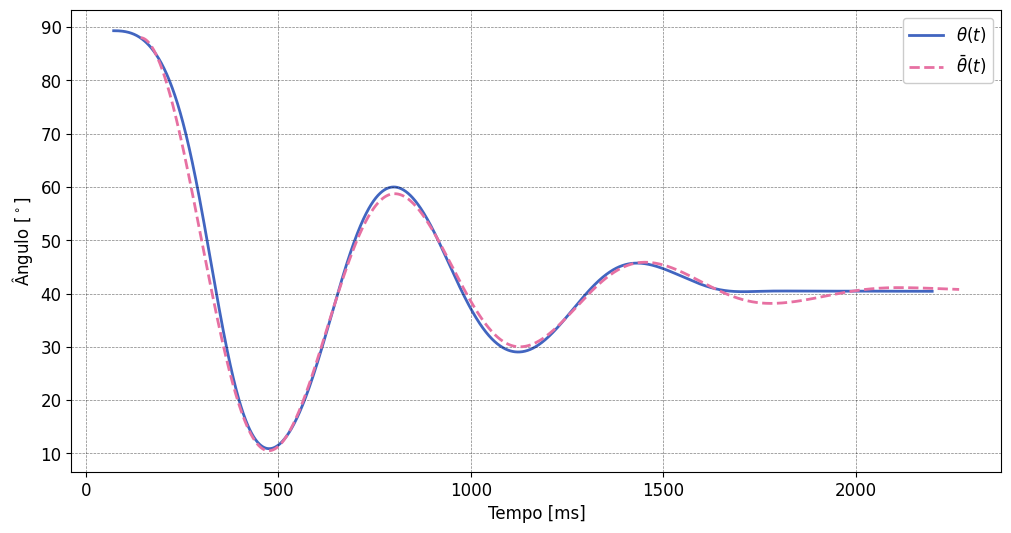

In [323]:
#Decupagem:
tosc = osc[0][800:3000]-osc[0][800]
angosclpf = LPF(osc[1][800:3000], 4, 5, 1e3)
tosc = tosc[72:]
angosclpf = angosclpf[72:]

#Simulação do sistema:
plate_sim = np.degrees(plate(time=tosc, J=0.3584*0.0014, b2=0.0157*0.08, b1=0.1144*0.007, b0=0.0112*0.34, m=0.072, g=9.81, l=0.068, th0=np.radians(88-45)))+45

#Plot:
plt.figure()
plt.plot(tosc*1e3, angosclpf*(89/99), label='$\\theta(t)$', zorder=0)
plt.plot(tosc*1e3+70, plate_sim, linestyle='dashed', label='$\\bar{\\theta}(t)$', zorder=1)
plt.ylabel('Ângulo [$^\circ$]')
plt.xlabel('Tempo [ms]')
plt.legend()
plt.show()